In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df_index =pd.read_csv('economic_index.csv')
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [18]:
df_index.drop(columns=['year','month'],axis=1,inplace=True)

In [19]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [15]:

df_index.info()
df_index.describe()
df_index.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               24 non-null     int64  
 1   month              24 non-null     int64  
 2   interest_rate      24 non-null     float64
 3   unemployment_rate  24 non-null     float64
 4   index_price        24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

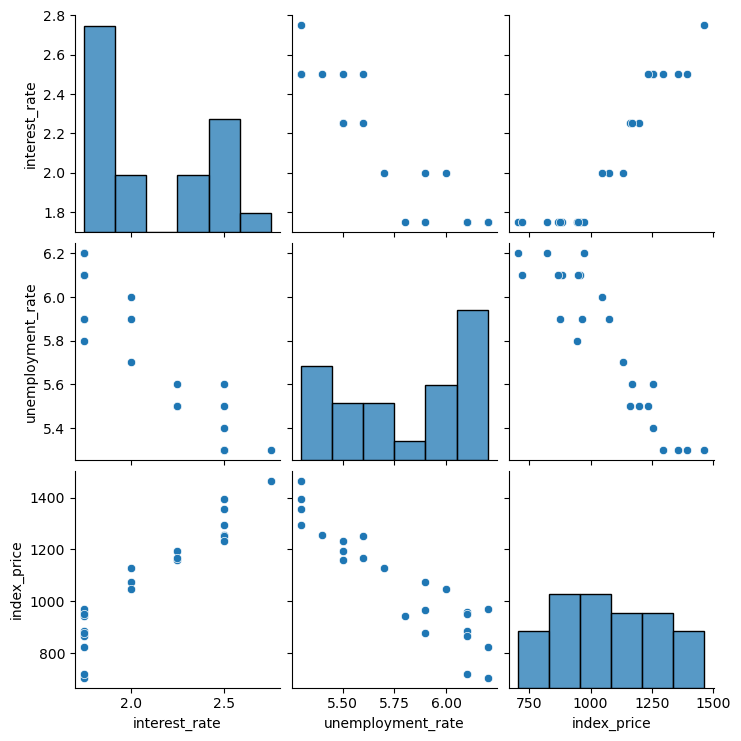

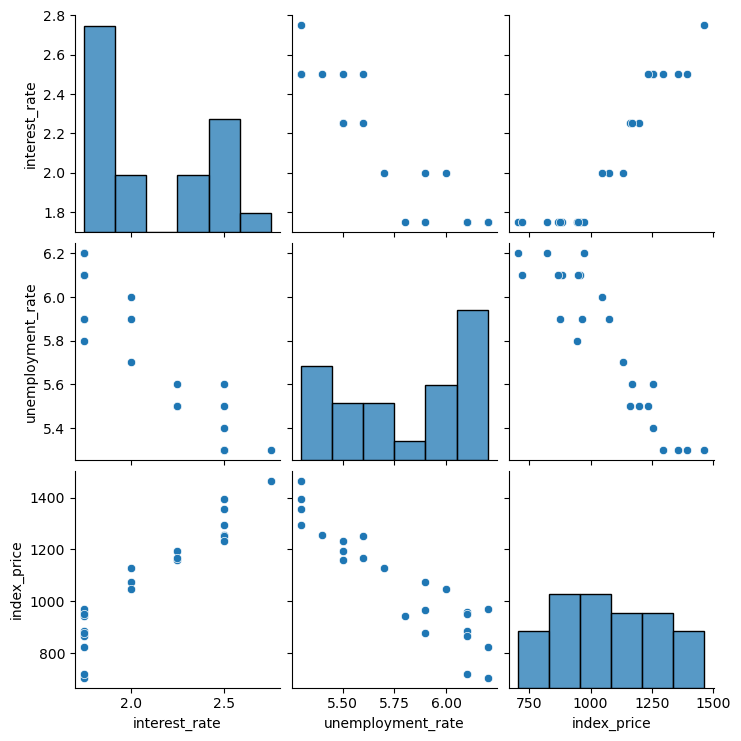

In [21]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [22]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


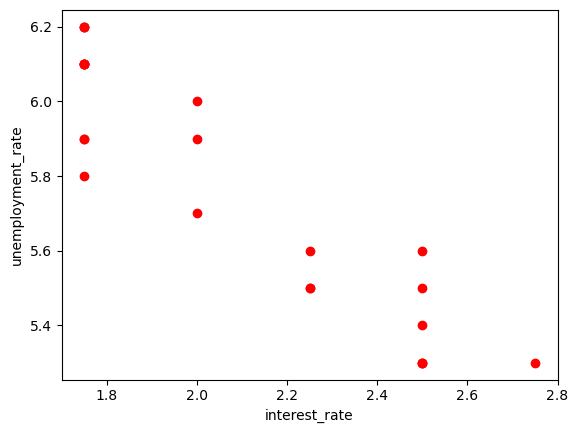

In [28]:
#visualize the datapoints
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()


In [29]:
X=df_index[['interest_rate','unemployment_rate']]
Y=df_index['index_price']

In [30]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [31]:
import seaborn as sns

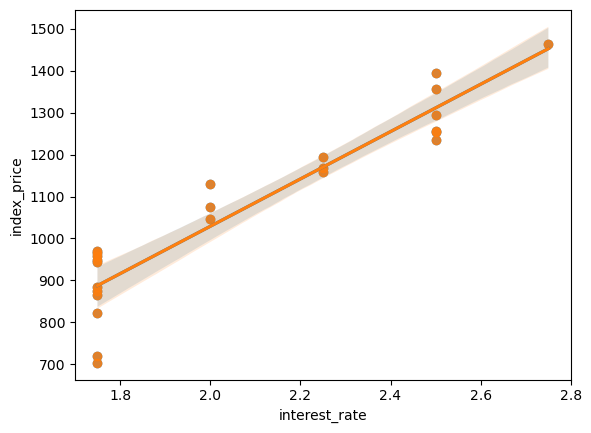

In [35]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

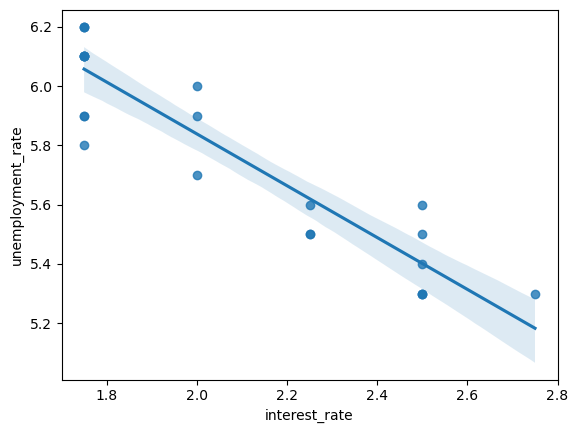

In [36]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [40]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [41]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [42]:
regression.fit(X_train,Y_train)

LinearRegression()

In [48]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [50]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [49]:
np.mean(validation_score)

-5914.828180162396

In [51]:
###prediction
Y_pred=regression.predict(X_test)

In [52]:
Y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [53]:
###Performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
#performance metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 5793.76288771258
Mean Absolute Error: 59.93578152323556
Root Mean Squared Error: 76.11677139574813


In [55]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print("R2 Score:", score)
print("Adjusted R2:", 1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

R2 Score: 0.8278978091457142
Adjusted R2: 0.713163015242857


In [61]:
print("Coefficient:", regression.coef_)

Coefficient: [  88.27275507 -116.25716066]


###assumptions

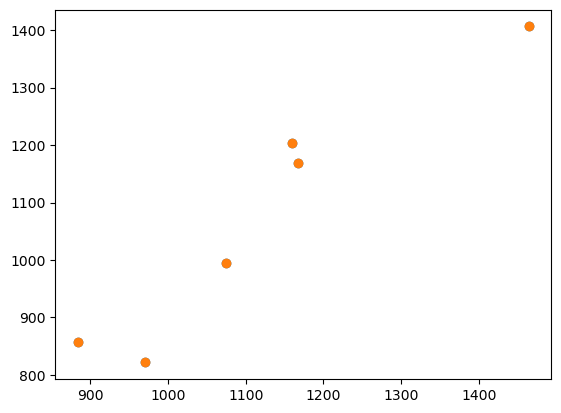

In [57]:
plt.scatter(Y_test,Y_pred)
plt.show()

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


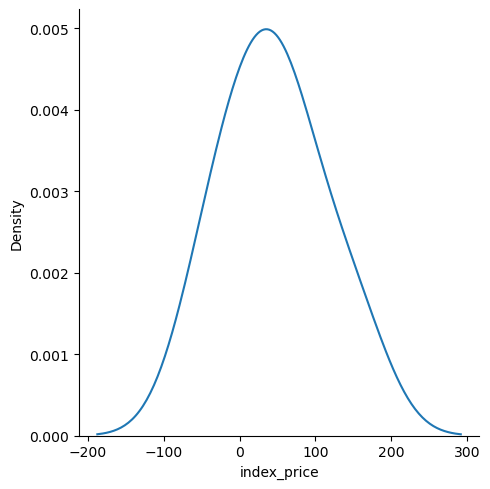

In [58]:
residuals = Y_test - Y_pred
print(residuals)
sns.displot(residuals, kind="kde")
plt.show()

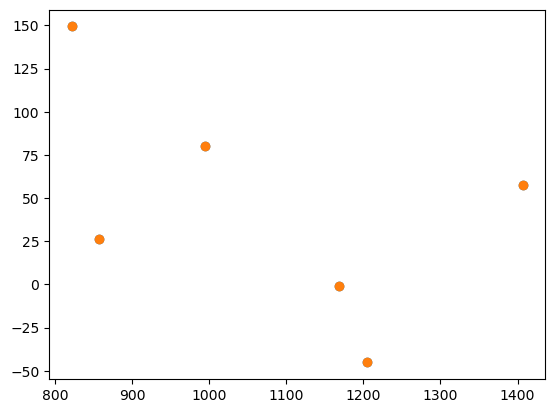

In [60]:
#scatter plot with respect to prediction and residuals
plt.scatter(Y_pred,residuals)
plt.show()

In [62]:
###OLS LINEAR REGRESSION
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [63]:
model.summary()

c:\Users\himan\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 02 Sep 2025   Prob (F-statistic):                       0.754
Time:                        20:44:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

same coeeff